# Material prediction using ML

### Library import

In [155]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Description
The material data is taken from different sources such as web pages, question-answer website, news, etc., and processed into structured data with the help of cleansing and deduplication algorithms. Data used in this project consists of 3 material properties i.e density, elasticity and strength. 3 types of materials are considered which are polymers, metals and ceramics. Data collected here are of a total of 950 materials among which 488 are polymers 325 are ceramics and 157 are metals.

## Objective
The objective of this project is to discover patterns in the materials data and then make predictions using machine learning algorithms to answer engineering questions, detect and analyse, predict trends and help solve problems.

## Question and answering with data
The user feed in material properties to the code and the code helps the user to identify to which type of material it belongs. In this project the user feeds in material properties like density, elasticity and strength and finds out whether it is a polymer or ceramic or metal.

### Importing material data

In [156]:
polymer_data=pd.read_excel("D:/ML_project/polymer.xlsx",dtype={'DensityA': np.float64, 'DensityB': np.float64, 'DensityA': np.float64, 'DensityB': np.float64, 'ElasticityA': np.float64, 'ElasticityB': np.float64, 'StrengthA': np.float64, 'StrengthB': np.float64})
polymer_data.head()

,DensityA,DensityB,ElasticityA,ElasticityB,StrengthA,StrengthB,Material
0,1.09,1.22,3.10,4.14,55.0,82.7,Polymer
1,0.99,1.10,0.20,6.80,40.0,122.0,Polymer
2,1.07,1.42,2.60,4.14,53.0,62.1,Polymer
3,1.13,1.50,3.79,5.86,68.9,110.0,Polymer
4,1.25,1.44,6.55,7.30,86.2,134.0,Polymer


In [157]:
metal_data=pd.read_excel("D:/ML_project/metal.xlsx",dtype={'DensityA': np.float64, 'DensityB': np.float64, 'DensityA': np.float64, 'DensityB': np.float64, 'ElasticityA': np.float64, 'ElasticityB': np.float64, 'StrengthA': np.float64, 'StrengthB': np.float64})
metal_data.head()

,DensityA,DensityB,ElasticityA,ElasticityB,StrengthA,StrengthB,Material
0,10.50,NaN,76.00,NaN,140.0,NaN,Metal
1,19.30,NaN,77.20,NaN,120.0,NaN,Metal
2,2.60,NaN,0.44,NaN,1.6,3.1,Metal
3,1.84,NaN,303.00,NaN,370.0,NaN,Metal
4,1.54,NaN,23.40,NaN,110.0,NaN,Metal


In [158]:
ceramic_data=pd.read_excel("D:/ML_project/ceramic.xlsx",dtype={'DensityA': np.float64, 'DensityB': np.float64, 'DensityA': np.float64, 'DensityB': np.float64, 'ElasticityA': np.float64, 'ElasticityB': np.float64, 'StrengthA': np.float64, 'StrengthB': np.float64})
ceramic_data.head()

,DensityA,DensityB,ElasticityA,ElasticityB,StrengthA,StrengthB,Material
0,3.96,NaN,370.0,NaN,300.0,NaN,Ceramic
1,3.40,3.53,215.0,240.0,115.0,160.0,Ceramic
2,3.61,3.75,270.0,295.0,170.0,240.0,Ceramic
3,3.70,3.97,360.0,NaN,259.0,262.0,Ceramic
4,3.90,NaN,340.0,NaN,240.0,NaN,Ceramic


### Appending all the materials data to one single dataframe

In [159]:
data=polymer_data.append(metal_data)
data=data.append(ceramic_data)
data=data.reset_index(drop=True)
data

,DensityA,DensityB,ElasticityA,ElasticityB,StrengthA,StrengthB,Material
0,1.09,1.22,3.10,4.14,55.0,82.7,Polymer
1,0.99,1.10,0.20,6.80,40.0,122.0,Polymer
2,1.07,1.42,2.60,4.14,53.0,62.1,Polymer
3,1.13,1.50,3.79,5.86,68.9,110.0,Polymer
4,1.25,1.44,6.55,7.30,86.2,134.0,Polymer
...,...,...,...,...,...,...,...
965,3.90,NaN,379.00,NaN,3100.0,NaN,Ceramic
966,3.40,NaN,248.00,NaN,2100.0,NaN,Ceramic
967,3.40,NaN,248.00,NaN,2100.0,NaN,Ceramic
968,1.79,NaN,26.90,NaN,141.0,NaN,Ceramic


### Replacing max and min of material properties with its mean

In [160]:
data['Density']=data[['DensityA','DensityB']].mean(axis=1)
data['Elasticity']=data[['ElasticityA','ElasticityB']].mean(axis=1)
data['Strength']=data[['StrengthA','StrengthB']].mean(axis=1)
data=data.drop(columns=['DensityA', 'DensityB', 'ElasticityA', 'ElasticityB', 'StrengthA','StrengthB'], axis=1)
data

,Material,Density,Elasticity,Strength
0,Polymer,1.155,3.620,68.85
1,Polymer,1.045,3.500,81.00
2,Polymer,1.245,3.370,57.55
3,Polymer,1.315,4.825,89.45
4,Polymer,1.345,6.925,110.10
...,...,...,...,...
965,Ceramic,3.900,379.000,3100.00
966,Ceramic,3.400,248.000,2100.00
967,Ceramic,3.400,248.000,2100.00
968,Ceramic,1.790,26.900,141.00


### Normalising the data

In [161]:
# df_min_max_scaled = data.copy()
# df_min_max_scaled=df_min_max_scaled.drop(columns=['Material'], axis=1)
# for column in df_min_max_scaled.columns:
#     df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
# df_min_max_scaled['Material']=data.drop(columns=['Density', 'Elasticity', 'Strength'], axis=1)
# data=df_min_max_scaled
# data

### Data cleanup

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Material    970 non-null    object 
 1   Density     970 non-null    float64
 2   Elasticity  970 non-null    float64
 3   Strength    970 non-null    float64
dtypes: float64(3), object(1)
memory usage: 30.4+ KB


In [163]:
data.isnull().sum()

Material      0
Density       0
Elasticity    0
Strength      0
dtype: int64

In [164]:
data=data.drop_duplicates(keep="first")
data.duplicated().sum()

0

In [165]:
data=data.reset_index(drop=True)
data

,Material,Density,Elasticity,Strength
0,Polymer,1.155,3.620,68.85
1,Polymer,1.045,3.500,81.00
2,Polymer,1.245,3.370,57.55
3,Polymer,1.315,4.825,89.45
4,Polymer,1.345,6.925,110.10
...,...,...,...,...
845,Ceramic,3.050,186.000,2000.00
846,Ceramic,3.900,379.000,3100.00
847,Ceramic,3.400,248.000,2100.00
848,Ceramic,1.790,26.900,141.00


## Methodology
In this project we predict material type based on its material properties. From figure below which is known as Ashby's plot we can see that materials when plotted with respect to its density, elasticity and strength form clusters. We can harness this characteristics of materials and use it for classifying materials. 
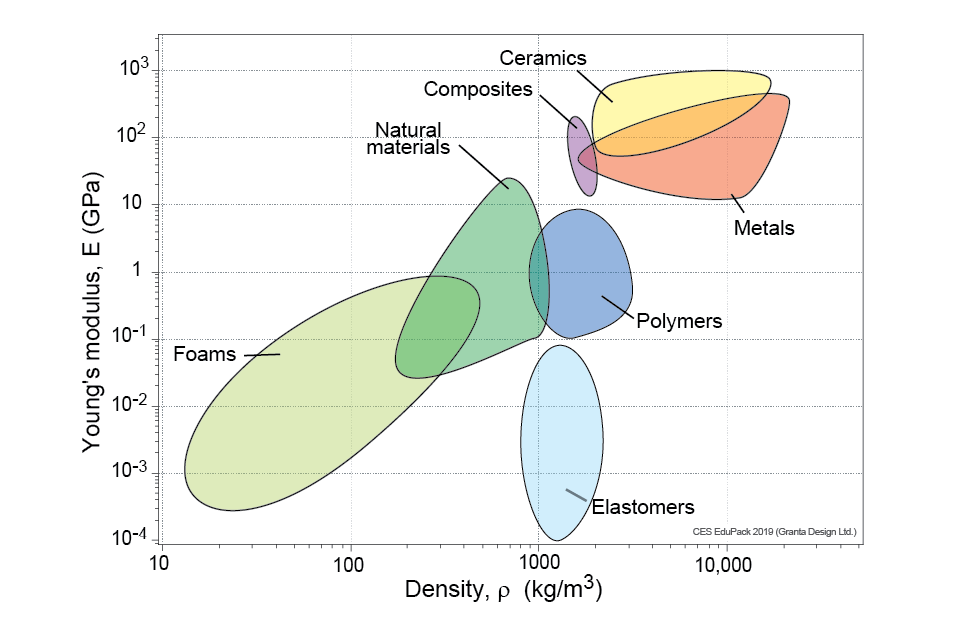 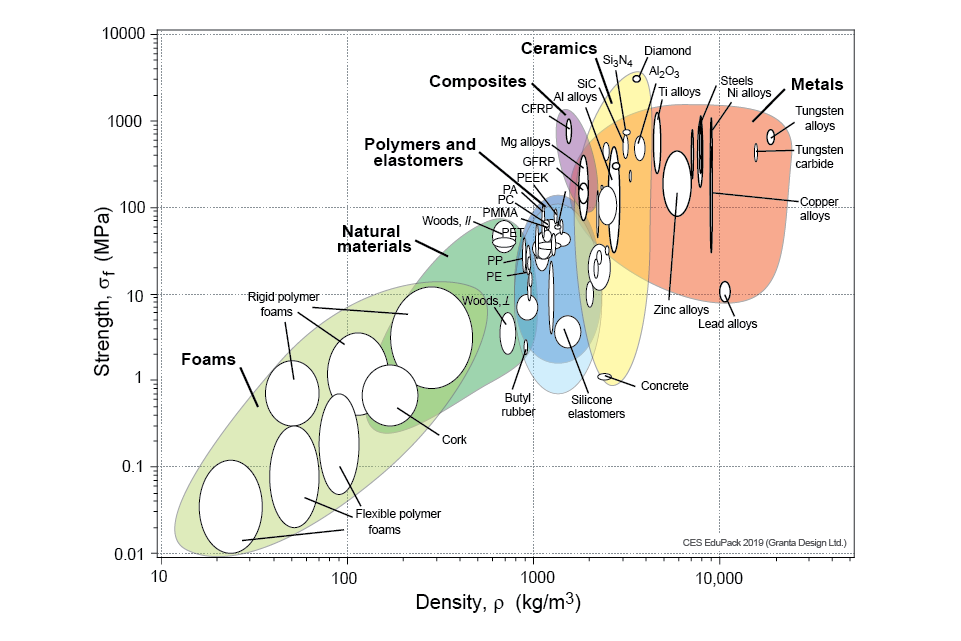

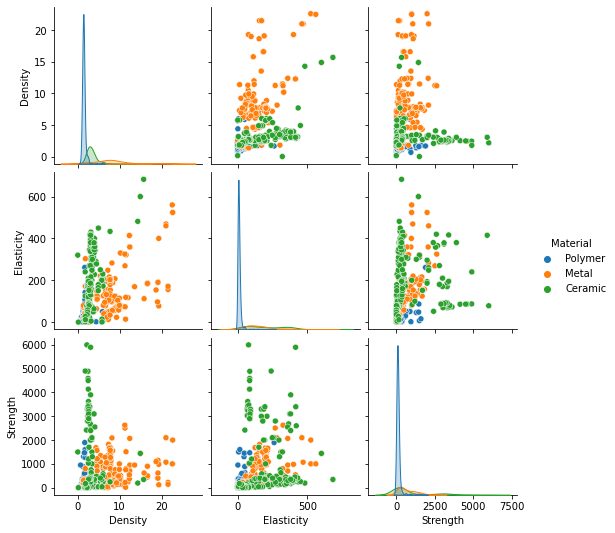

In [166]:
sns.pairplot(data,hue='Material')

### Data preparation
Initially we convert categorical variables into a numeric by using Ordinal encoder. Then data is splitted into training and testing data. 

In [167]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["Material_code"] = ord_enc.fit_transform(data[["Material"]])
data[["Material", "Material_code"]]
data=data.drop(columns=['Material'])
data

,Density,Elasticity,Strength,Material_code
0,1.155,3.620,68.85,2.0
1,1.045,3.500,81.00,2.0
2,1.245,3.370,57.55,2.0
3,1.315,4.825,89.45,2.0
4,1.345,6.925,110.10,2.0
...,...,...,...,...
845,3.050,186.000,2000.00,0.0
846,3.900,379.000,3100.00,0.0
847,3.400,248.000,2100.00,0.0
848,1.790,26.900,141.00,0.0


### Data spliting

In [168]:
y = data['Material_code']
X = data.drop('Material_code', axis=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

### Model fit using logistic regression

In [169]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(train_X,train_y)
y_pred = lr.predict(val_X)
precision = metrics.accuracy_score(y_pred,val_y) * 100
print("Accuracy with Logistic Regression: {0:.2f}%".format(precision))

Accuracy with Logistic Regression: 92.49%


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model fit using Decision tree

In [170]:
tree = DecisionTreeClassifier()
tree = tree.fit(train_X,train_y)
y_pred = tree.predict(val_X)
precision = metrics.accuracy_score(val_y,y_pred) * 100
print("Accuracy with Decision Tree: {0:.2f}%".format(precision))

Accuracy with Decision Tree: 95.31%


## Model accuracy enhancement 
We found the accuracy to be about 94%. Accuracy of a model is condidered good when its more than 95% and this done by using by using random forest algorithm. Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

### Model fit using Random Forest

In [171]:
model = RandomForestClassifier(random_state=1)
model.fit(train_X, train_y)
pred_y = model.predict(val_X)
accuracy = metrics.accuracy_score(val_y, pred_y) * 100
print("Accuracy with Random Forest: {0:.2f}% ".format(accuracy))

Accuracy with Random Forest: 95.31% 


In [175]:
model.predict([[3,26,141]])

array([0.])

## Result discussion
By applying classifier algorithms like logistic regression, decision tree and random forest we were able to train and fit the model. Using logistic regression we were able to achieve 88.26% and 94.84% of accuracy using decision tree which was enhanced to 95.3% by using random forest.

## Conclusion
In this project we built a system can detect patterns and relationships in data, example from web data, where it will predict trends in the material properties. This project can be applied to predict trends, detect anomalies and find the optimum solution to engineering problems.In order to evaluate the performance of the system, the metrics like precision, recall was used. After this, the data is queried for extracting the relevant information. With the help of different machine learning algorithms, the data is processed and patterns are discovered. Prediction is then made to answer the engineering questions.